# Apply Machine Learning Algorithms to Predict Average Rating of Books

In this notebook we will run a few Regression Machine Learning Algorithms to predict the **Average_Rating** of books based on some other features that we have extraced and cleaned so far.  
<br>Let's do that in the following steps:
1. Remove Text Columns/ Features not so appealing for Predictive Modelling
2. Convert Boolean Featues or Categorical Variables to Integer(0/1) values
3. Split the data into Training and Test set
4. Train the Regression Models with our Training DataSet 
5. Evaluate and Compare Accuracy of the different Models using our Test Dataset

In this notebooks we are going to explore the below Models:
   - Linear Regression using statsmodels (Ordinary Least Squares (OLS))
   - Linear Regression using sckit-learn
   - Random Forest
   - Support Vector Regression or SVR

#### Import Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
#from sklearn.preprocessing import LabelEncoder
import pandas as pd
#from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import itertools
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols
#from statsmodels.graphics.regressionplots import *
import seaborn as sns
##--
from sklearn import svm
from sklearn.svm import SVR

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Import DataFrame For Modelling

In [3]:
%store -r df_details

In [4]:
df_details.head(2)

,book_id,isbn,title,total_pages,average_rating,ratings_count,reviews_count,publication_date,publisher,book_description,...,year,yearn,yet,york,young,younger,youth,zero,zombi,zone
0,1,0439785960,Harry Potter and the Half-Blood Prince (Harry ...,652.0,4.56,1940880,26187,2006-09-16,Scholastic Inc.,When Harry Potter and the Half-Blood Prince op...,...,1,0,1,0,0,0,0,0,0,0
1,2,0439358078,Harry Potter and the Order of the Phoenix (Har...,870.0,4.49,1993215,27553,2004-09-01,Scholastic Inc.,There is a door at the end of a silent corrido...,...,1,0,0,0,0,0,0,0,0,0


### Preprocessing Data before fitting a Model

#### Delete not-required columns

Let's clean up the dataframe and remove the columns which we are not going to use for Modelling.

In [5]:
del df_details["book_id"]
del df_details["isbn"]
del df_details["title"]
del df_details["ratings_count"]
del df_details["reviews_count"]
del df_details["publisher"]
del df_details["hometown"]
del df_details["publication_date"]
del df_details["book_description"]
del df_details["word_list"]
del df_details["author_id"]
del df_details["author_name"]
del df_details["birth_on"]
del df_details["death_on"]

#### Convert Boolean Columns to Integer Columns

In [6]:
df_details["classics"] = df_details["classics"].astype(int)
df_details["thriller"] = df_details["thriller"].astype(int)
df_details["comics"] = df_details["comics"].astype(int)
df_details["romance"] = df_details["romance"].astype(int)
df_details["paranormal"] = df_details["paranormal"].astype(int)
df_details["historical"] = df_details["historical"].astype(int)
df_details["humour"] = df_details["humour"].astype(int)
df_details["dystopian"] = df_details["dystopian"].astype(int)

#### Convert Gender column to Integer Column

In [7]:
df_details["gender"] = df_details["gender"].replace('female',0)
df_details["gender"] = df_details["gender"].replace('male',1)
df_details["gender"] = df_details["gender"].replace('genderqueer',1)

In [8]:
df_details.head(2)

,total_pages,average_rating,fans_count,gender,works_count,classics,thriller,romance,paranormal,humour,...,year,yearn,yet,york,young,younger,youth,zero,zombi,zone
0,652.0,4.56,198576,0,191,1,1,1,1,0,...,1,0,1,0,0,0,0,0,0,0
1,870.0,4.49,198576,0,191,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


Befor starting our Modelling part, let's take a final look at the Average_rating data.

#### Plot Average Rating

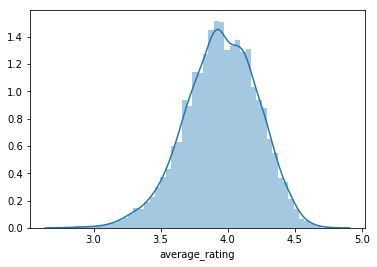

In [9]:
sns.distplot(df_details['average_rating'])

The Average Rating Data is Normally Distributed in our current Dataset.

## Apply Machine Learning Algorithms

#### Train Test Split

In [10]:
#X = df_details[df_details.columns - ["average_rating"],axis=1]
X = df_details.loc[:, df_details.columns != "average_rating"]
y = df_details.filter(['average_rating'],axis =1)

In [11]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7660, 2218)
(7660, 1)
(1916, 2218)
(1916, 1)


### Model 1: Train a Linear Regression With statsmodels

**Statsmodel** is a Python library designed for more statistically-oriented approaches to data analysis. It has some built in support for many of the statistical tests to check the quality of the fit and a dedicated set of plotting functions to visualize and diagnose the fit. 

In [13]:
### STATSMODELS ###
lm1 = ols(formula='y ~ X', data=df_details).fit()

In [14]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     2.612
Date:                Tue, 28 May 2019   Prob (F-statistic):          5.05e-200
Time:                        10:20:20   Log-Likelihood:                 1641.5
No. Observations:                9576   AIC:                             1155.
Df Residuals:                    7357   BIC:                         1.706e+04
Df Model:                        2218                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8731      0.010    390.131      0.0

The Adjusted $R^2$ Score using the Statsmodel is **0.272**

### Model 2: Train a Linear Regression Model With scikit-learn

In [15]:
# Create the regressor: reg
lm = linear_model.LinearRegression()
# Fit the regressor to the training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Model 3: Train a Random Forest Model

In [16]:
# Establish model
rf = RandomForestRegressor(n_jobs=-1)
# Try different numbers of n_estimators 
estimators = [5, 20, 50, 100, 200]
score = []
for n in estimators:
    rf.set_params(n_estimators=n, max_depth=None)
    rf.fit(X_train, y_train)
    score.append(rf.score(X_test, y_test))

#### Plot the Score for Different Estimator Values

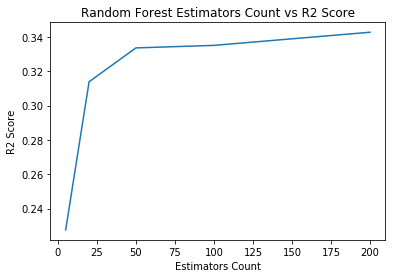

In [17]:
_ = plt.plot(estimators,score)
_ = plt.xlabel("Estimators Count")
_ = plt.ylabel("R2 Score")
_ = plt.title("Random Forest Estimators Count vs R2 Score")
plt.show()

At around 150 estimators, the score seems to get stable and not increasing anymore. So, let's settle down with 200 estimators.

### Model 4: Train a Support Vector Regression Model

In [18]:
clf = svm.SVR()
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

## Compare and Evaluate Different Models

#### Predictions from Linear Regression Model

In [19]:
# Predict on the test data: y_pred
y_pred_lm = lm.predict(X_test)
y_pred_lm = y_pred_lm.round(2)
y_pred_lm = y_pred_lm.tolist()
y_pred_lm = list(itertools.chain.from_iterable(y_pred_lm))
#y_pred_lm

#### Predictions from Random Forest Model

In [20]:
y_pred_rf = rf.predict(X_test)  
y_pred_rf = y_pred_rf.round(2)

#### Predictions from SVR Model

In [21]:
y_pred_svm = clf.predict(X_test)  
y_pred_svm = y_pred_svm.round(2)

#### Compute $R^2$ Score

In [22]:
print('R^2 Score for Linear Regression Model:', round(lm.score(X_test, y_test),3))
print('R^2 Score for Random Forest Model:', round(rf.score(X_test, y_test),3))
print('R^2 Score for SVR Model:', round(clf.score(X_test, y_test),3))

R^2 Score for Linear Regression Model: -0.1
R^2 Score for Random Forest Model: 0.343
R^2 Score for SVR Model: 0.253


#### Compute Mean Absolute Error

In [23]:
print('Mean Absolute Error for Linear Regression Model:', metrics.mean_absolute_error(y_test, y_pred_lm))  
print('Mean Absolute Error for Random Forest Model:', metrics.mean_absolute_error(y_test, y_pred_rf))  
print('Mean Absolute Error for SVR Model:', metrics.mean_absolute_error(y_test, y_pred_svm))  

Mean Absolute Error for Linear Regression Model: 0.21870041753653444
Mean Absolute Error for Random Forest Model: 0.16927453027139874
Mean Absolute Error for SVR Model: 0.1782045929018789


#### Compute Mean Squared Error

In [24]:
print('Mean Squared Error for Linear Regression Model:', metrics.mean_squared_error(y_test, y_pred_lm))  
print('Mean Squared Error for Random Forest Model:', metrics.mean_squared_error(y_test, y_pred_rf))  
print('Mean Squared Error for SVR Model:', metrics.mean_squared_error(y_test, y_pred_svm))  

Mean Squared Error for Linear Regression Model: 0.07892896659707724
Mean Squared Error for Random Forest Model: 0.04713408141962421
Mean Squared Error for SVR Model: 0.05355657620041753


#### Compute Root Mean Squared Error

In [25]:
print('Root Mean Squared Error for Linear Regression Model:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lm)))
print('Root Mean Squared Error for Random Forest Model:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('Root Mean Squared Error for SVR Model:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm)))

Root Mean Squared Error for Linear Regression Model: 0.2809429952803188
Root Mean Squared Error for Random Forest Model: 0.21710384938923633
Root Mean Squared Error for SVR Model: 0.23142293793057234


#### Compare Actual Values vs Predicted Values for Linear Regression and Random Forest Model

In [26]:
actual_values = np.asarray(y_test.average_rating)
lm_pred_values = np.asarray(y_pred_lm)
rf_pred_values = np.asarray(y_pred_rf)
svr_pred_values = np.asarray(y_pred_svm)
results = pd.DataFrame({'actual_values':actual_values, 
                        'lm_pred_values':lm_pred_values,
                        'rf_pred_values':rf_pred_values,
                        'svr_pred_values':svr_pred_values})
results.head()

,actual_values,lm_pred_values,rf_pred_values,svr_pred_values
0,3.81,4.01,3.79,3.82
1,3.94,4.20,3.90,3.93
2,3.56,3.63,3.78,3.49
3,4.20,3.87,4.05,4.09
4,3.94,4.19,3.99,4.02


#### Plot Actual Results vs Predicted Results

Text(0.5, 1.0, 'Predicted vs Actual Rating')

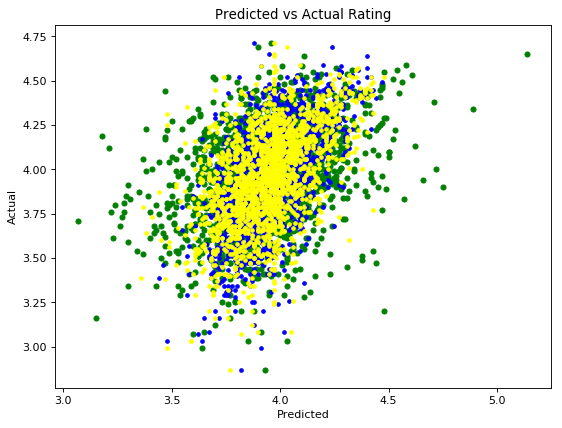

In [35]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(results.lm_pred_values, results.actual_values, color = 'green', s= 20.0)
plt.scatter(results.rf_pred_values, results.actual_values, color = 'blue',s= 10.0)
plt.scatter(results.svr_pred_values, results.actual_values, color = 'yellow',s= 10.0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual Rating")

#### Features Importance

In [36]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.importance.sort_values(ascending = False)[:20]

fans_count     0.176676
total_pages    0.073430
works_count    0.045398
comics         0.028262
novel          0.006856
dystopian      0.006485
world          0.005676
humour         0.004511
paranormal     0.004159
romance        0.004037
find           0.004032
dalla          0.004016
one            0.003779
historical     0.003369
seri           0.003297
classics       0.003290
year           0.003160
gender         0.003105
thriller       0.003044
new            0.002864
Name: importance, dtype: float64

#### Compute Accuracy for the Models

In [38]:
lm_errors = abs(y_pred_lm - y_test.average_rating)
lm_mape = 100 * (lm_errors / y_test.average_rating)
lm_accuracy = 100 - np.mean(lm_mape)
print('Accuracy for Linear Regression Model:', round(lm_accuracy, 2), '%.')
rf_errors = abs(y_pred_rf - y_test.average_rating)
rf_mape = 100 * (rf_errors / y_test.average_rating)
rf_accuracy = 100 - np.mean(rf_mape)
print('Accuracy for Random Forest Model:', round(rf_accuracy, 2), '%.')
svr_errors = abs(y_pred_svm - y_test.average_rating)
svr_mape = 100 * (svr_errors / y_test.average_rating)
svr_accuracy = 100 - np.mean(svr_mape)
print('Accuracy for SVR Model:', round(svr_accuracy, 2), '%.')

Accuracy for Linear Regression Model: 94.42 %.
Accuracy for Random Forest Model: 95.66 %.
Accuracy for SVR Model: 95.44 %.
